# Exploring a dictionary-based approach with Empath

**COLAB NOTEBOOK VERSION:** To run this notebook in CoLab, please [click here](https://colab.research.google.com/github/senthilchandrasegaran/IDEM105-EDI/blob/main/empath.ipynb).

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

In [1]:
!pip install empath
import pandas as pd
from empath import Empath
lexicon = Empath()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57798 sha256=76cdc8b844bc222914ce5ac7be5a41341ed9b605a4783495df03b531715c5ef8
  Stored in directory: /root/.cache/pip/wheels/b5/93/85/f4e8694df404eb214060dd0e0f3fda14398638f5835b3dde23
Successfully built empath


In [2]:
transcript_df = pd.read_excel('/content/Transcript bewerkt-final.xlsx')
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance
1120,1120,01:43:13,Tessel Pluym,And the limitations.
1023,1023,01:33:45,Sarah Duister,"OK, we have to record."
884,884,01:19:14,Sarah Duister,Yeah.


In [3]:
from datetime import time
def convert_to_seconds(t_str):
    t = time.fromisoformat(t_str)
    sec = t.hour * 3600 + t.minute * 60 + t.second
    return sec

transcript_df['timestamp_sec'] = transcript_df['timestamp'].apply(convert_to_seconds)
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec
961,961,01:28:10,Jasmijn Miog,"Helps with safety, I think.",5290
171,171,00:11:03,Sarah Duister,Yeah. And I think also.,663
747,747,01:05:34,Tessel Pluym,"Yeah, and they never.",3934


In [4]:
utterances = transcript_df['utterance'].to_list()

## Get the list of categories from Empath
Empath has a set of predefined categories. To create a new category of your own, use the following command. The command takes two inputs: a category name, and a short list of 3 to 5 sample or "seed" words to help Empath populate the category.

In [5]:
category_name = "thinking"
category_seed_words = ["think", "make", "inspiration"]
lexicon.create_category(category_name, category_seed_words)

["Because", "actually", "If", "write", "though", "guess", "cause", "Maybe", "maybe", "mean", "honestly", "like", "anyway", "inspiration", "hope", "understand", "might", "help", "cause", "try", "Now", "story", "Plus", "should", "work", "hopefully", "Or", "Also", "probably", "forget", "anyways", "Well", "motivation", "find", "whatever", "best", "wish", "so", "thought", "Honestly", "suppose", "means", "things", "anything", "add", "reason", "always", "believe", "Sometimes", "Actually", "wanted", "ideas", "So", "seriously", "remind", "cause", "anyway", "trust", "Hopefully", "figured", "part", "need", "Anyway"]


To analyze a piece of text using this category, use the following function.

In [6]:
lexicon.analyze("Let's maybe try this new approach.", categories=["thinking"], normalize=True)

{'thinking': 0.3333333333333333}

## Analysing a piece of text using Empath
Let's say you want to see if a text uses a higher density of `thinking` words (i.e, the number of 'positive emotion' words divided by the total words in the review) than another text. For that matter, we just want to see what the `thinking` scores are across all the reviews. We can use the following approach.

Some categories: prototyping, fixation, agreement, disagreement, insight

We can create a function for this approach so that we can pass this function to the dataframe.

In [7]:
def calc_thinking(text):
    category = 'thinking'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

transcript_df['thinking'] = transcript_df['utterance'].apply(calc_thinking)

transcript_df.sample(5)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec,thinking
1027,1027,01:33:53,Sarah Duister,Until the break.,5633,0.000000
193,193,00:12:50,Jasmijn Miog,"Yeah, also.",770,0.000000
166,166,00:10:40,Sarah Duister,You feel safe because there are people around ...,640,0.000000
719,719,01:03:29,Tessel Pluym,"But I think homeless people, that's could work...",3809,0.043478
384,384,00:28:15,Tessel Pluym,"That's they, of course, want to have everyone ...",1695,0.000000


We can then plot a histogram of the scores to see their distribution.

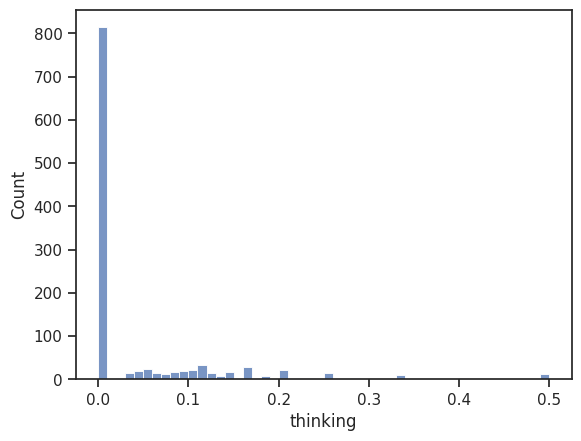

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(dpi=100)

g = sns.histplot(x='thinking', data=transcript_df)

<Figure size 640x480 with 0 Axes>

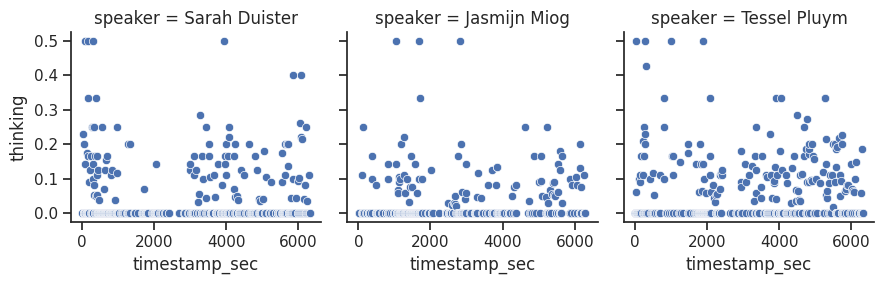

In [9]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "thinking")


## A similar approach for sentiment analysis

In [10]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [11]:
def sentiment(text) :
    vs = analyzer.polarity_scores(text)['compound']
    return vs

In [12]:
transcript_df['sentiment'] = transcript_df['utterance'].apply(sentiment)
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec,thinking,sentiment
89,89,00:05:05,Sarah Duister,"Yeah, I.",305,0.0,0.296
145,145,00:09:00,Sarah Duister,Yeah.,540,0.0,0.296
358,358,00:25:58,Jasmijn Miog,And secluded parade.,1558,0.0,0.000


<Figure size 640x480 with 0 Axes>

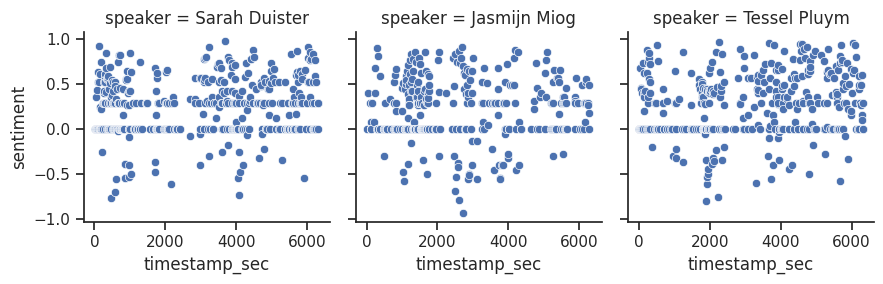

In [13]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "sentiment")

<Axes: xlabel='thinking', ylabel='sentiment'>

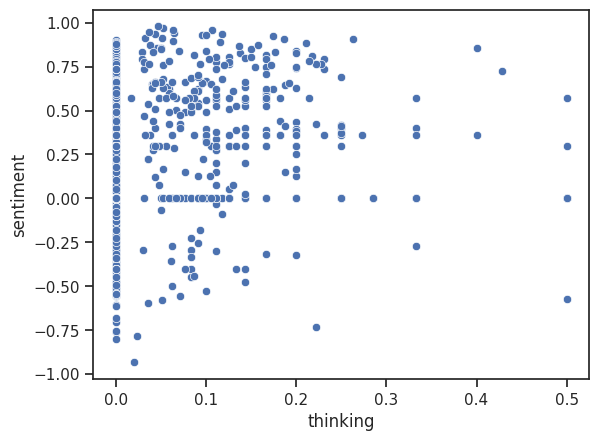

In [14]:
sns.scatterplot(data=transcript_df, x = "thinking", y="sentiment")

## Exercise

Identify a particular behaviour you notice in your session's transcript.


**Specify:** think of words related to "convergence"

Can you create an Empath category for this behaviour?
Analyze the transcript with your new category.
Compare your transcript with someone else's?



In [23]:
from empath import Empath
lexicon = Empath()

# Ideation category
category_name = "ideation"
category_seed_words = ["imagine", "brainstorm", "innovate", "create", "ideas"]
lexicon.create_category(category_name, category_seed_words)

# Problem-solving category
category_name = "problem_solving"
category_seed_words = ["challenge", "solution", "resolve", "problem", "fix"]
lexicon.create_category(category_name, category_seed_words)

["create", "ideas", "incorporate", "imagine", "inspire", "write", "own_ideas", "invent", "creativity", "include", "insight", "combine", "plot", "improve", "influence", "new_ideas", "add", "promote", "recreate", "possibly", "plots", "characters", "different_ideas", "own_story", "works", "inspiration", "theories", "research", "visualize", "base", "achieve", "story", "descriptions", "remake", "examples", "links", "preferences", "concepts", "Also", "storyline", "imaginations", "aspects", "experimenting", "alter", "motivate", "progress", "parts", "character", "other_characters", "writing", "evolve", "short_stories", "stories", "future", "benefit", "relate", "portray", "experiment", "motivation", "predict", "accomplish", "moral", "and/or", "fandoms", "perspectives", "everyday_life", "conclude", "development", "If", "contribute", "poems", "backstory", "casting", "new_idea", "references", "users", "different_perspective", "quotes", "reader", "daily_life", "develop", "romance", "define", "use",

In [24]:
def calc_ideation(text):
    category = 'ideation'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

def calc_problem_solving(text):
    category = 'problem_solving'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

transcript_df['ideation'] = transcript_df['utterance'].apply(calc_ideation)
transcript_df['problem_solving'] = transcript_df['utterance'].apply(calc_problem_solving)

# Assuming you already have a 'sentiment' column from previous analysis
# If not, refer to previous responses for sentiment analysis code

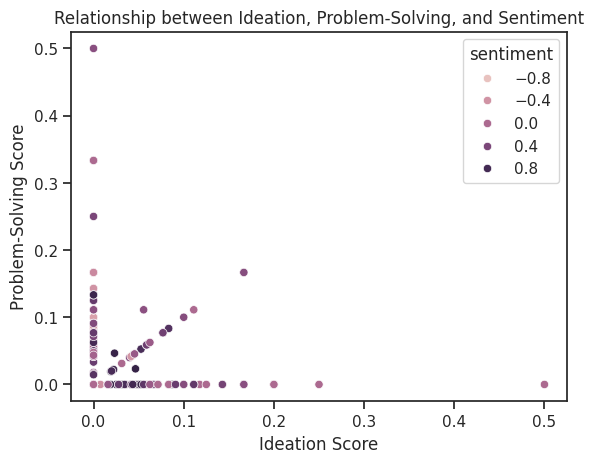

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=100)
sns.scatterplot(data=transcript_df, x="ideation", y="problem_solving", hue="sentiment")
plt.xlabel("Ideation Score")
plt.ylabel("Problem-Solving Score")
plt.title("Relationship between Ideation, Problem-Solving, and Sentiment")
plt.show()

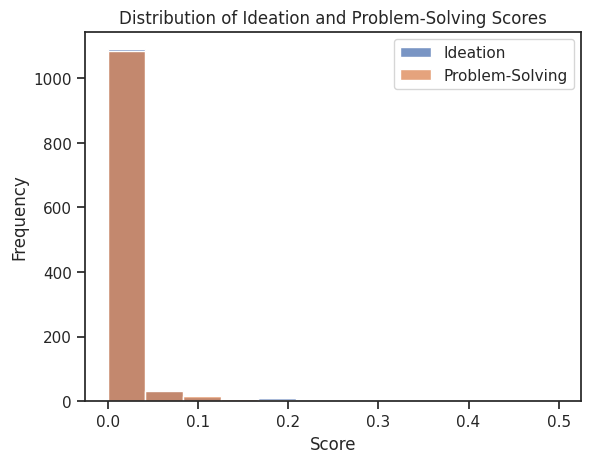

In [26]:
plt.figure(dpi=100)
sns.histplot(data=transcript_df, x="ideation", label="Ideation")
sns.histplot(data=transcript_df, x="problem_solving", label="Problem-Solving")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Ideation and Problem-Solving Scores")
plt.legend()
plt.show()